In [1]:
from transformers import AutoTokenizer
from vllm import LLM

model = "qwq-32b"
model_id = "Qwen/QwQ-32B"
tokenizer = AutoTokenizer.from_pretrained(model_id)

/home/yanick/miniforge3/envs/csm-mwps/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 10-22 18:03:07 __init__.py:183] Automatically detected platform cuda.


2025-10-22 18:03:07,233	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
import os
import pandas as pd

def load_more_complex_results(model_name):

    df1 = pd.read_csv(os.path.join("results", model_name, "disconnected_more_complex_no_overlap_nonground.csv"))
    df2 = pd.read_csv(os.path.join("results", model_name, "disconnected_more_complex_entity_overlap_nonground.csv"))
    df3 = pd.read_csv(os.path.join("results", model_name, "disconnected_more_complex_agent_overlap_nonground.csv"))
    df4 = pd.read_csv(os.path.join("results", model_name, "disconnected_more_complex_agent_entity_overlap_nonground.csv"))
    df = pd.concat([df1, df2, df3, df4])

    df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]

    return df[["true_efficient_cot", "model_cot"]]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = load_more_complex_results("Meta-Llama-3.1-8B-Instruct")
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")
df1["annotated tokens"] = df1.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df1["model tokens"] = df1.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df1["model"] = "Meta-Llama-3.1-8B-Instruct"

df2 = load_more_complex_results("Qwen2.5-Math-7B-Instruct")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-Math-7B-Instruct")
df2["annotated tokens"] = df2.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df2["model tokens"] = df2.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df2["model"] = "Qwen2.5-Math-7B-Instruct"

df3 = load_more_complex_results("qwq-32b")
tokenizer = AutoTokenizer.from_pretrained("Qwen/QwQ-32B")
df3["annotated tokens"] = df3.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df3["model tokens"] = df3.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df3["model"] = "QwQ-32B"

df4 = load_more_complex_results("deepseek-r1")
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1")
df4["annotated tokens"] = df4.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df4["model tokens"] = df4.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df4["model"] = "DeepSeek-R1"

df = pd.concat([df1,df2,df3,df4])[["model", "annotated tokens", "model tokens"]]

In [4]:
# --- NeurIPS 2025-style fonts ---
plt.rcParams.update({
    "font.family": "STIXGeneral",     # serif font similar to Times New Roman
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,
})

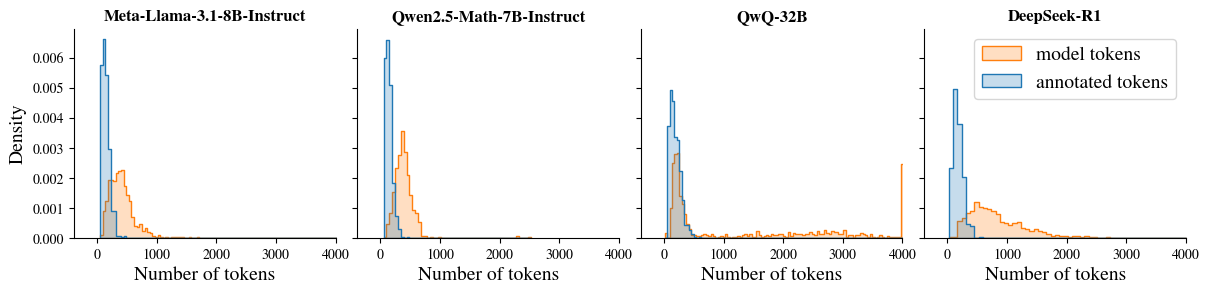

In [5]:
df_melted = df.melt(id_vars='model', var_name='Source', value_name='Number of tokens')


g = sns.FacetGrid(df_melted, col='model', sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='Number of tokens', hue='Source', element='step', stat='density', common_norm=False)
plt.legend(["model tokens", "annotated tokens"], fontsize=14)
g.add_legend()
g.set(xlim=(None, 4000)) 
g.set_axis_labels("Number of tokens", "Density", fontsize=14)
g.set_titles(col_template='{col_name}', fontweight='bold', size=12)
plt.show()

g.savefig("figures/num_tokens.pdf", dpi=500, bbox_inches='tight')

In [6]:
df_melted

,model,Source,Number of tokens
0,Meta-Llama-3.1-8B-Instruct,annotated tokens,94
1,Meta-Llama-3.1-8B-Instruct,annotated tokens,64
2,Meta-Llama-3.1-8B-Instruct,annotated tokens,130
3,Meta-Llama-3.1-8B-Instruct,annotated tokens,183
4,Meta-Llama-3.1-8B-Instruct,annotated tokens,207
...,...,...,...
8485,DeepSeek-R1,model tokens,1010
8486,DeepSeek-R1,model tokens,1001
8487,DeepSeek-R1,model tokens,2675
8488,DeepSeek-R1,model tokens,780


In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_base_results(model_name):

    df = pd.read_csv(os.path.join("results", model_name, "base_simple_no_overlap_nonground.csv"))
    return df[["true_efficient_cot", "model_cot"]]

df1 = load_base_results("Meta-Llama-3.1-8B-Instruct")
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")
df1["annotated tokens"] = df1.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df1["model tokens"] = df1.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df1["model"] = "Meta-Llama-3.1-8B-Instruct"

df2 = load_base_results("Qwen2.5-Math-7B-Instruct")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-Math-7B-Instruct")
df2["annotated tokens"] = df2.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df2["model tokens"] = df2.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df2["model"] = "Qwen2.5-Math-7B-Instruct"

df3 = load_base_results("qwq-32b")
tokenizer = AutoTokenizer.from_pretrained("Qwen/QwQ-32B")
df3["annotated tokens"] = df3.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df3["model tokens"] = df3.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df3["model"] = "QwQ-32B"

df4 = load_base_results("deepseek-r1")
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1")
df4["annotated tokens"] = df4.apply(lambda x: len(tokenizer.encode(x["true_efficient_cot"])), axis=1)
df4["model tokens"] = df4.apply(lambda x: len(tokenizer.encode(x["model_cot"])), axis=1)
df4["model"] = "DeepSeek-R1"

df = pd.concat([df1,df2,df3,df4])[["model", "annotated tokens", "model tokens"]]

In [8]:
# --- NeurIPS 2025-style fonts ---
plt.rcParams.update({
    "font.family": "STIXGeneral",     # serif font similar to Times New Roman
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,
})

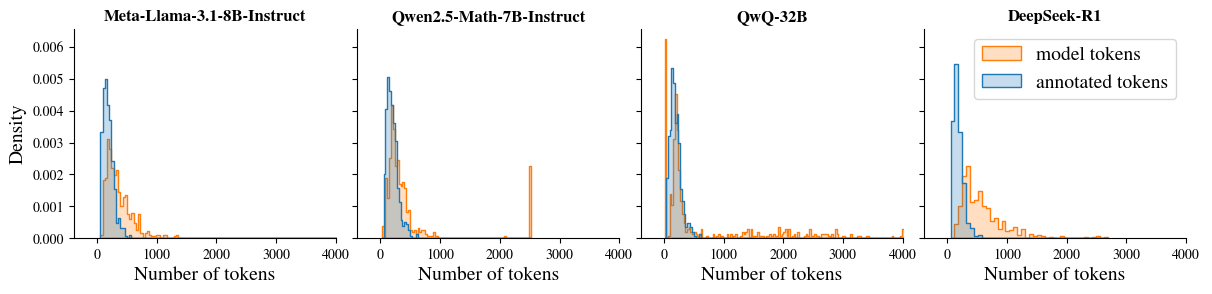

In [9]:
df_melted = df.melt(id_vars='model', var_name='Source', value_name='Number of tokens')


g = sns.FacetGrid(df_melted, col='model', sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='Number of tokens', hue='Source', element='step', stat='density', common_norm=False)
plt.legend(["model tokens", "annotated tokens"], fontsize=14)
g.add_legend()
g.set(xlim=(None, 4000)) 
g.set_axis_labels("Number of tokens", "Density", fontsize=14)
g.set_titles(col_template='{col_name}', fontweight='bold', size=12)
plt.show()

g.savefig("figures/num_tokens_base.pdf", dpi=500, bbox_inches='tight')